In [ ]:
import pandas as pd

df = pd.read_csv("review_overview.csv")

#拆分原始dataframe
part1 = df.iloc[:300001]
part2 = df.iloc[300001:500001]
part3 = df.iloc[500001:700001]
part4 = df.iloc[700001:1000001]
part5 = df.iloc[1000001:1300001]
part6 = df.iloc[1300001:1600001]
part7 = df.iloc[1600001:1733312]

part1.to_csv("part1.csv", index=None, encoding="UTF-8-sig")
part2.to_csv("part2.csv", index=None, encoding="UTF-8-sig")
part3.to_csv("part3.csv", index=None, encoding="UTF-8-sig")
part4.to_csv("part4.csv", index=None, encoding="UTF-8-sig")
part5.to_csv("part5.csv", index=None, encoding="UTF-8-sig")
part6.to_csv("part6.csv", index=None, encoding="UTF-8-sig")
part7.to_csv("part7.csv", index=None, encoding="UTF-8-sig")

print("---Done---")

In [ ]:
import pandas as pd

# part1 = pd.read_csv('part1.csv')
# part2 = pd.read_csv('part2.csv')
# part3 = pd.read_csv('part3.csv')
part4 = pd.read_csv('part4.csv')
# part5 = pd.read_csv('part5.csv')
# part6 = pd.read_csv('part6.csv')
# part7 = pd.read_csv('part7.csv')

In [ ]:
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import time
from transformers import BertTokenizer, BertModel, BertConfig, BertTokenizerFast
import pandas as pd
import numpy as np

# 建立模型
new_model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-224/", output_attentions=True)
new_model.to('cuda')  # 將模型移至GPU

#建構一個分詞器使用bert-base-chinese詞庫去分詞，超過max_length會截斷，不夠會padding
max_seq_length = 512
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese',max_length=max_seq_length,padding='max_length', truncation=True)

# 載入評論資料
df_pre_star = part4

# 初始化 PipelineInterface
PipelineInterface = TextClassificationPipeline(model=new_model, tokenizer=tokenizer,device=0, return_all_scores=False)

#計時開始
start_time = time.time()

# 進行預測        
for i in range(len(df_pre_star["rw_review"])):
    text = df_pre_star.loc[i, "rw_review"]
    if text is np.nan:
        df_pre_star.loc[i, "new_star_label"] = np.nan
    else:
        if len(text) > 512:
            inputs = tokenizer(text, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
            inputs.to('cuda')  # 將輸入資料移到GPU
            text = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)
        result = PipelineInterface(text)
        df_pre_star.loc[i, "new_star_label"] = result[0]["label"]

df_pre_star.to_csv("part4_new.csv", index=None, encoding="UTF-8-sig")
print("---Done---")

#計時結束
end_time = time.time()

total_time = end_time - start_time

print("Total_Time:{:02d}:{:02d}:{:02d}".format(int(total_time//3600),int((total_time % 3600) // 60),int(total_time % 60)))

In [ ]:
import pandas as pd

# part1 = pd.read_csv('part1_new.csv')
# part2 = pd.read_csv('part2_new.csv')
# part3 = pd.read_csv('part3_new.csv')
# part4 = pd.read_csv('part4_new.csv')
# part5 = pd.read_csv('part5_new.csv')
# part6 = pd.read_csv('part6_new.csv')
# part7 = pd.read_csv('part7_new.csv')

In [ ]:
#合併原始dataframe
combined_df = pd.concat([part1, part2, part3, part4, part5, part6, part7], ignore_index=True)

combined_df.to_csv("review_overview_newstar.csv", index=None, encoding="UTF-8-sig")
print("---Done---")

# 資料處理

In [1]:
import pandas as pd
rev_ove = pd.read_csv("review_overview.csv", encoding = "UTF-8-sig")
rev_ove = rev_ove.dropna(subset = ["new_star_label"])

C:\Users\zxsde\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
print(rev_ove["new_star_label"].isnull().any())

False


In [3]:
rev_ove["new_star_label"] = rev_ove["new_star_label"].apply(lambda x: int(x.replace("顆星", "")))
print(rev_ove.head(5))

   Unnamed: 0           rw_name      rw_current_time rw_category  \
0           0  125K---石墨烯遠紅外線汗蒸  2023-08-03 13:11:08        旅遊景點   
3           3  125K---石墨烯遠紅外線汗蒸  2023-08-03 13:11:08        旅遊景點   
4           4  125K---石墨烯遠紅外線汗蒸  2023-08-03 13:11:08        旅遊景點   
5           5  125K---石墨烯遠紅外線汗蒸  2023-08-03 13:11:08        旅遊景點   
6           6  125K---石墨烯遠紅外線汗蒸  2023-08-03 13:11:08        旅遊景點   

               rw_tag rw_tickets_sale  \
0  無障礙入口 無障礙停車場 適合兒童              NaN   
3  無障礙入口 無障礙停車場 適合兒童              NaN   
4  無障礙入口 無障礙停車場 適合兒童              NaN   
5  無障礙入口 無障礙停車場 適合兒童              NaN   
6  無障礙入口 無障礙停車場 適合兒童              NaN   

                                        rw_open_time  rw_Monday_open  \
0  星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...           900.0   
3  星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...           900.0   
4  星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...           900.0   
5  星期四09:00–17:00 星期五09:00–17:00 星期六09:00–17:00 星...    

In [4]:
rev_ove.columns

Index(['Unnamed: 0', 'rw_name', 'rw_current_time', 'rw_category', 'rw_tag',
       'rw_tickets_sale', 'rw_open_time', 'rw_Monday_open', 'rw_Monday_close',
       'rw_Tuesday_open', 'rw_Tuesday_close', 'rw_Wednesday_open',
       'rw_Wednesday_close', 'rw_Thursday_open', 'rw_Thursday_close',
       'rw_Friday_open', 'rw_Friday_close', 'rw_Saturday_open',
       'rw_Saturday_close', 'rw_Sunday_open', 'rw_Sunday_close', 'rw_latitude',
       'rw_longitude', 'rw_introduction', 'rw_rating_total',
       'rw_rating_count_total', 'rw_phone', 'rw_address', 'rw_reviewer',
       'rw_reviewer_page', 'rw_reviewer_tag', 'rw_review_time',
       'rw_rating_reviewer', 'rw_likes', 'rw_review', 'rw_review_word',
       'rw_city', 'rw_town', 'new_star_label'],
      dtype='object')

In [5]:
counts = rev_ove["rw_name"].value_counts().reset_index()
counts.columns = ["rw_name", "count"]
counts

,rw_name,count
0,全地型沙灘車 立式划槳 - 臺東 太麻里 ATV & SUP Taitung TaiMaLi...,1572
1,仁愛鄉清境創始店Cona's 妮娜巧克力｜世界得獎143面、獨家專利、冠軍巧克力,1253
2,無口小廚 Mukuchi Kitchen & Bar,1227
3,淨園農場(婚禮、派對場地),791
4,淡水情人塔 Lover's Tower,762
...,...,...
6061,石德公園,1
6062,鹽水大和行,1
6063,海賊糧倉,1
6064,山仔腳木棉道,1


In [6]:
counts_new = counts[counts["count"]>=30]
counts_new

,rw_name,count
0,全地型沙灘車 立式划槳 - 臺東 太麻里 ATV & SUP Taitung TaiMaLi...,1572
1,仁愛鄉清境創始店Cona's 妮娜巧克力｜世界得獎143面、獨家專利、冠軍巧克力,1253
2,無口小廚 Mukuchi Kitchen & Bar,1227
3,淨園農場(婚禮、派對場地),791
4,淡水情人塔 Lover's Tower,762
...,...,...
5059,小坪頂山,30
5060,金龍窯,30
5061,獅潭護魚步道,30
5062,海蛙石,30


In [7]:
rev_ove_new = pd.merge(rev_ove, counts_new, on="rw_name", how="inner")
rev_ove_new2 = rev_ove_new[["rw_name","new_star_label"]]

In [8]:
import numpy as np

def random_sample(group):
    return group.sample(30, replace=False)

result = rev_ove_new2.groupby("rw_name").apply(random_sample)
result["index_column"] = range(len(result))
result.set_index("index_column", inplace=True)
print(result)

                       rw_name  new_star_label
index_column                                  
0             125K---石墨烯遠紅外線汗蒸               2
1             125K---石墨烯遠紅外線汗蒸               2
2             125K---石墨烯遠紅外線汗蒸               4
3             125K---石墨烯遠紅外線汗蒸               5
4             125K---石墨烯遠紅外線汗蒸               3
...                        ...             ...
151915                𩻸魚堀溪觀魚步道               5
151916                𩻸魚堀溪觀魚步道               5
151917                𩻸魚堀溪觀魚步道               5
151918                𩻸魚堀溪觀魚步道               5
151919                𩻸魚堀溪觀魚步道               5

[151920 rows x 2 columns]


In [9]:
result_mean = result.groupby('rw_name')['new_star_label'].mean().round(1).reset_index()

In [10]:
print(result_mean.head(5))
print(len(result_mean))

            rw_name  new_star_label
0  125K---石墨烯遠紅外線汗蒸             3.3
1           140高地公園             3.9
2        167咖啡 海銀花園             4.6
3      1895乙未保台紀念公園             4.4
4    1895八卦山抗日保台史蹟館             3.2
5064


In [11]:
recommend_count = result[result["new_star_label"] > 3].groupby('rw_name')['new_star_label'].count().reset_index()
recommend_count.rename(columns={'new_star_label': 'good'}, inplace=True)
result_mean = result_mean.merge(recommend_count, on='rw_name', how='left')
result_mean['good'].fillna(int(0), inplace=True)

recommend_count = result[result["new_star_label"] == 3].groupby('rw_name')['new_star_label'].count().reset_index()
recommend_count.rename(columns={'new_star_label': 'neutral'}, inplace=True)
result_mean = result_mean.merge(recommend_count, on='rw_name', how='left')
result_mean['neutral'].fillna(int(0), inplace=True)

recommend_count = result[result["new_star_label"] < 3].groupby('rw_name')['new_star_label'].count().reset_index()
recommend_count.rename(columns={'new_star_label': 'bad'}, inplace=True)
result_mean = result_mean.merge(recommend_count, on='rw_name', how='left')
result_mean['bad'].fillna(int(0), inplace=True)

result_mean["good"] = result_mean["good"].astype(int)
result_mean["neutral"] = result_mean["neutral"].astype(int)
result_mean["bad"] = result_mean["bad"].astype(int)
print(result_mean.head(5))
print(len(result_mean))

            rw_name  new_star_label  good  neutral  bad
0  125K---石墨烯遠紅外線汗蒸             3.3    15        5   10
1           140高地公園             3.9    19       10    1
2        167咖啡 海銀花園             4.6    28        2    0
3      1895乙未保台紀念公園             4.4    26        2    2
4    1895八卦山抗日保台史蹟館             3.2    12        8   10
5064


In [12]:
search_clear = pd.read_csv("search_clear.csv", encoding = "UTF-8-sig")
print(search_clear)

      Unnamed: 0      keyword                name         current_time  \
0              0  南投縣中寮鄉 景點推薦  中寮劉家梅園休園（一期一會明年再見）  2023-08-02 18:35:21   
1              1  南投縣中寮鄉 景點推薦             剝皮寮歷史街區  2023-08-02 18:35:21   
2              2  南投縣中寮鄉 景點推薦              仙洞坪棋盤石  2023-08-02 18:35:21   
3              3  南投縣中寮鄉 景點推薦               中寮石龍宮  2023-08-02 18:35:21   
4              4  南投縣中寮鄉 景點推薦              南投龍鳳瀑布  2023-08-02 18:35:21   
...          ...          ...                 ...                  ...   
5979        6070  高雄市鼓山區 景點推薦              內惟李氏祖厝  2023-08-08 18:40:56   
5980        6071  高雄市鼓山區 景點推薦             萬壽山龍泉禪寺  2023-08-08 18:40:56   
5981        6072  高雄市鼓山區 景點推薦                 少女峰  2023-08-08 18:40:56   
5982        6073  高雄市鼓山區 景點推薦              打鼓岩元亨寺  2023-08-08 18:40:56   
5983        6074  高雄市鼓山區 景點推薦               鼓山地嶽殿  2023-08-08 18:40:56   

      rating  rating_count category     address             introduce  \
0        4.3           125     旅遊景點   

In [13]:
new_search_clear = search_clear.merge(result_mean, left_on="name", right_on="rw_name", how="inner")
new_search_clear = new_search_clear.drop("rw_name", axis=1)
print(new_search_clear)

      Unnamed: 0      keyword     name         current_time  rating  \
0              1  南投縣中寮鄉 景點推薦  剝皮寮歷史街區  2023-08-02 18:35:21     4.2   
1              2  南投縣中寮鄉 景點推薦   仙洞坪棋盤石  2023-08-02 18:35:21     3.6   
2              3  南投縣中寮鄉 景點推薦    中寮石龍宮  2023-08-02 18:35:21     4.6   
3              4  南投縣中寮鄉 景點推薦   南投龍鳳瀑布  2023-08-02 18:35:21     4.0   
4              5  南投縣中寮鄉 景點推薦    仙峰日月洞  2023-08-02 18:35:21     3.9   
...          ...          ...      ...                  ...     ...   
4713        6069  高雄市鼓山區 景點推薦  一號船渠景觀橋  2023-08-08 18:40:56     4.2   
4714        6071  高雄市鼓山區 景點推薦  萬壽山龍泉禪寺  2023-08-08 18:40:56     4.3   
4715        6072  高雄市鼓山區 景點推薦      少女峰  2023-08-08 18:40:56     4.6   
4716        6073  高雄市鼓山區 景點推薦   打鼓岩元亨寺  2023-08-08 18:40:56     4.4   
4717        6074  高雄市鼓山區 景點推薦    鼓山地嶽殿  2023-08-08 18:40:56     4.7   

      rating_count category     address             introduce  \
0            12238     歷史建築     康定路173巷        18 世紀房屋林立的城市街區   
1               8

In [14]:
new_search_clear.to_csv("new_search_clear.csv", index=None, encoding="UTF-8-sig")
print("---Done---")

---Done---


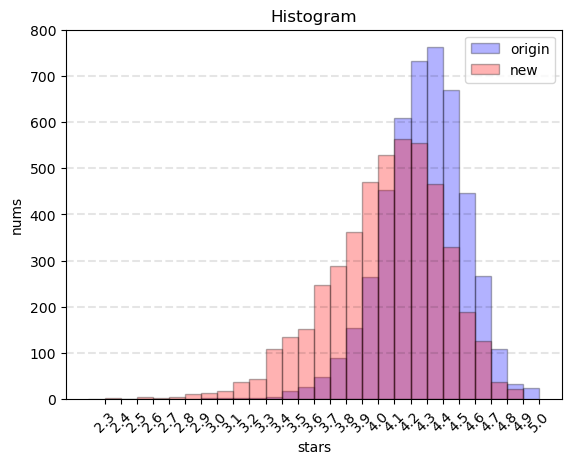

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df_search = pd.read_csv("new_search_clear.csv", encoding = "UTF-8-sig")
data1 = df_search["rating"]
data2 = df_search["new_star_label"]

bins1 = sorted(data1.unique())
bins2 = sorted(data2.unique())

plt.hist(data1, bins=bins1, edgecolor='black', color='blue', alpha=0.3, label="origin")
plt.hist(data2, bins=bins2, edgecolor='black', color='red', alpha=0.3, label='new')

plt.xlabel('stars')
plt.ylabel('nums')
plt.title('Histogram')

y_values = [100, 200, 300, 400, 500, 600, 700]
for y_value in y_values:
    plt.axhline(y_value, color='black', linestyle='--', alpha=0.1)
    
bins2.append(5.0)
plt.xticks(bins2, [f'{val:.1f}' for val in bins2], rotation=45)

plt.legend()
plt.show()

In [4]:
import pandas as pd

df_search = pd.read_csv("new_search_clear.csv", encoding = "UTF-8-sig")
df_search.to_excel('new_search_clear.xlsx', index=False, encoding = "UTF-8-sig")

# df_search = pd.read_csv("new_review_overview.csv", encoding = "UTF-8-sig")
# df_search.to_excel('new_review_overview.xlsx', index=False, encoding = "UTF-8-sig")
print("---Done---")

---Done---
